In [4]:
import json
import matplotlib.pyplot as plt
import os

DATASET_PATH = "../datasets/ariths_gen_sampled_100/train"

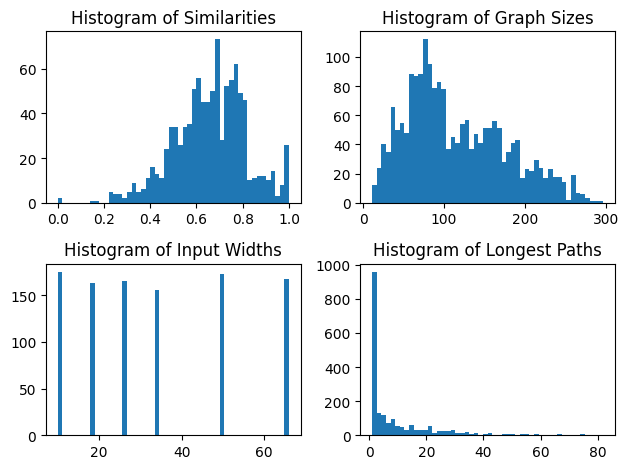

In [12]:
with open(os.path.join(DATASET_PATH, "metadata.json"), "r") as f:
    stats = json.load(f)
    
    
fig, axs = plt.subplots(2, 2)

# Create a histogram for the "similarity" statistic
axs[0, 0].hist(stats['similarity'], bins=50)
axs[0, 0].set_title('Histogram of Similarities')

# Create a histogram for the "graph_size" statistic
axs[0, 1].hist(stats['graph_size'], bins=50)
axs[0, 1].set_title('Histogram of Graph Sizes')

# Create a histogram for the "input_width" statistic
axs[1, 0].hist(stats['input_width'], bins=50)
axs[1, 0].set_title('Histogram of Input Widths')

# Create a histogram for the "longest_path" statistic
axs[1, 1].hist(stats['longest_path'], bins=50)
axs[1, 1].set_title('Histogram of Longest Paths')
fig.tight_layout()